ANALYZING ENERGY CONSUMPTION ACROSS VARIOUS SECTORS IN THE PRE- INDUSTRIALIZATION ERA
(EARLY POST INDEPENDENCE AND PLANNED ECONOMY ERA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read data

In [2]:
df_50_70 = pd.read_excel("../cleaned_data/period_data/1950_1970.xlsx")
df_50_70 = df_50_70.sort_values("Year")

Getting number of years

In [3]:
start_year = df_50_70['Year'].iloc[0]
end_year = df_50_70['Year'].iloc[-1]
n_years = end_year - start_year

Calculating CAGR

In [ ]:
cagr_dict = {}
for col in df_50_70.columns:
    if col != 'Year':
        start_val = df_50_70[col].iloc[0]
        end_val = df_50_70[col].iloc[-1]
        if start_val > 0 and end_val > 0:
            cagr = ((end_val / start_val) ** (1/n_years)) - 1
            cagr_dict[col] = cagr * 100  # convert to percentage

CAGR bar plot

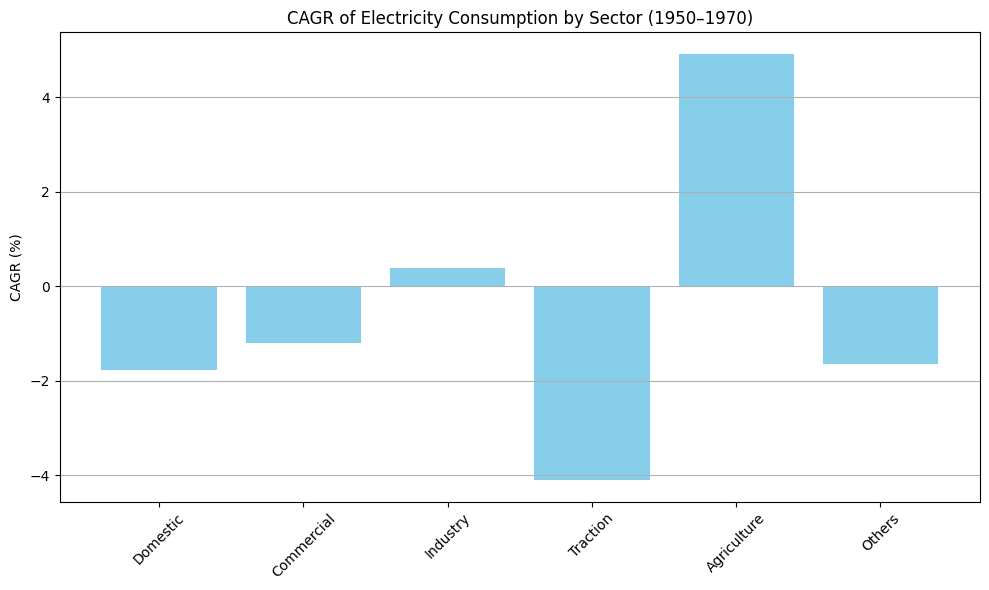

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(cagr_dict.keys(), cagr_dict.values(), color='skyblue')
plt.title("CAGR of Electricity Consumption by Sector (1950–1970)")
plt.ylabel("CAGR (%)")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

stacked area chart for sector shares

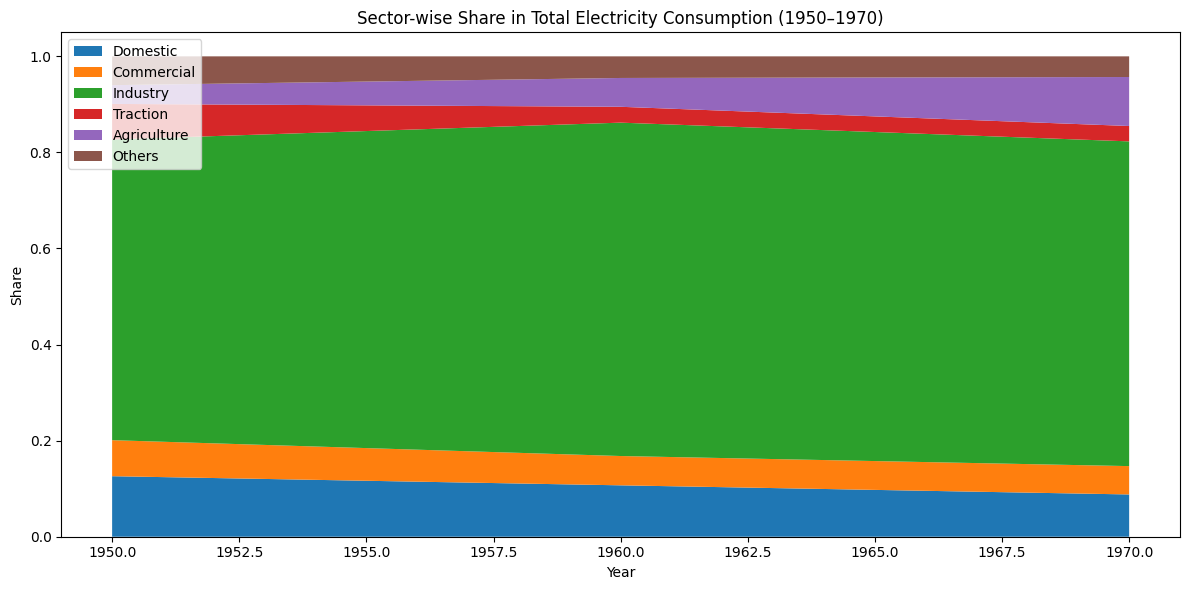

In [6]:
# Copying to avoid modifying original
df_share = df_50_70.copy()

# Computing total consumption per year
df_share['Total'] = df_share.drop(columns='Year').sum(axis=1)

# Calculating sector shares
sectors = df_share.columns.drop(['Year', 'Total'])
for col in sectors:
    df_share[col] = df_share[col] / df_share['Total']

# Plotting stacked area chart
plt.figure(figsize=(12,6))
plt.stackplot(df_share['Year'], [df_share[col] for col in sectors], labels=sectors)
plt.title("Sector-wise Share in Total Electricity Consumption (1950–1970)")
plt.xlabel("Year")
plt.ylabel("Share")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


Correlation heat map for sector consumption

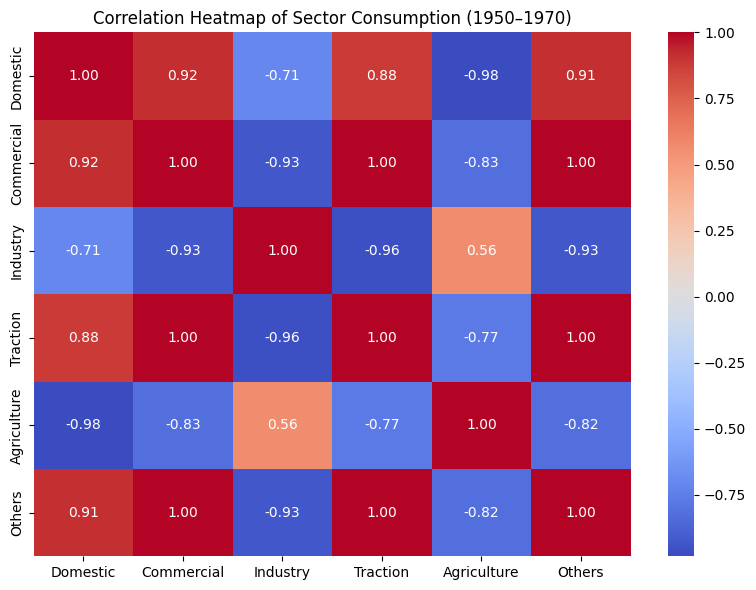

In [7]:
import seaborn as sns

# Drop Year column and compute correlation
df_corr = df_50_70.drop(columns='Year').corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Sector Consumption (1950–1970)")
plt.tight_layout()
plt.show()


Summary table for sector growth

In [18]:
def compute_summary(df):
    total_consumption = df.drop(columns='Year').sum(axis=1)
    summary_data = []

    for sector in df.columns:
        if sector == 'Year':
            continue

        values = df[sector]
        years = df['Year']
        start_val = values.iloc[0]
        end_val = values.iloc[-1]
        n_years = years.iloc[-1] - years.iloc[0]

        cagr = ((end_val / start_val) ** (1 / n_years)) - 1 if start_val > 0 else np.nan

        yoy_growth = values.pct_change().dropna()

        if not yoy_growth.empty:
            idx_max = yoy_growth.idxmax()
            idx_min = yoy_growth.idxmin()

            year_high_growth = years.loc[idx_max]
            year_low_growth = years.loc[idx_min]
        else:
            year_high_growth = np.nan
            year_low_growth = np.nan

        avg_share = (values / total_consumption * 100).mean()
        std_dev = np.std(values)
        median_val = np.median(values)
        consumption_range = values.max() - values.min()

        corr_with_industry = np.nan
        if 'Industry' in df.columns and sector != 'Industry':
            corr_with_industry = df[sector].corr(df['Industry'])

        summary_data.append({
            'Sector': sector,
            'Start Value': start_val,
            'End Value': end_val,
            'CAGR (%)': round(cagr * 100, 2) if not np.isnan(cagr) else None,
            'Avg Consumption Share (%)': round(avg_share, 2),
            'Std Dev': round(std_dev, 2),
            'Median': round(median_val, 2),
            'Range': round(consumption_range, 2),
            'Year of Highest Growth': year_high_growth,
            'Year of Lowest Growth': year_low_growth,
            'Corr with Industry': round(corr_with_industry, 3) if not np.isnan(corr_with_industry) else None
        })

    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values(by='CAGR (%)', ascending=False).reset_index(drop=True)

    return summary_df

summary_1950_1970 = compute_summary(df_50_70)
summary_1950_1970


,Sector,Start Value,End Value,CAGR (%),Avg Consumption Share (%),Std Dev,Median,Range,Year of Highest Growth,Year of Lowest Growth,Corr with Industry
0,Agriculture,3.9,10.2,4.92,6.70,2.62,6.0,6.3,1970,1960,0.564
1,Industry,62.6,67.6,0.38,66.53,2.88,67.6,6.8,1960,1970,NaN
2,Commercial,7.5,5.9,-1.19,6.50,0.71,6.1,1.6,1970,1960,-0.931
3,Others,6.0,4.3,-1.65,4.93,0.76,4.5,1.7,1970,1960,-0.934
4,Domestic,12.6,8.8,-1.78,10.70,1.55,10.7,3.8,1960,1970,-0.710
5,Traction,7.4,3.2,-4.11,4.63,1.96,3.3,4.2,1970,1960,-0.961
